# Tienen orden las variables? 

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import sidetable

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

#Para poder cambiar fechas
# ----------------------------------------------------------------------
from datetime import date, datetime
import calendar
import holidays

ModuleNotFoundError: No module named 'sidetable'

In [ ]:
df = pd.read_pickle('bikes_sin_outliers.pk')
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2018-01-01,invierno,0.0,1.0,festivo,1.0,laborable,2.0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,2.0,2018-01-02,invierno,0.0,1.0,no festivo,2.0,laborable,2.0,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0


# Variables : 

- instant	
- dteday	
- season	
- yr	
- mnth	
- holiday	
- weekday	
- workingday	
- weathersit	
- temp	
- atemp	
- hum	
- windspeed	
- casual	
- registered	
- cnt

# Recordacion

- Si las variables categóricas **NO tienen** orden usaremos: 

    - One-Hot Encoding

    - get_dummies
---
- Si las variables categóricas **tienen** orden usaremos: 

    - Label-Encoding

    - map

    - Ordinal-Encoding

R lineal :- Lo modelos de **regresión lineal** son aquellos en los que la variable respuesta es de tipo continua

    Variable Alquiler de bicis

- Los modelos de **regresión lógistica** son aquellos cuya variable respuesta será una variable de tipo categórica.
        
        RLogistica : Es registrado o no'

1. Son variables Similares? 

In [ ]:
def similar_variables(lista_variables,plot = True):
    for columna in lista_variables:
        print(' Los valores únicos para la variable',columna, 'son:', list( df[columna].unique()))
        value_counts = df[columna].value_counts()
        if plot == True:
            plt.figure()
            plt.grid()
            mycolors = ['#4c9c85','#a0c6b9','#c8dbd5','#f1f1f1','#eed4f4','#e9b8f8','#e39afb']
            value_counts.plot.pie(figsize=(12,8), shadow = True,colors = mycolors,autopct='%1.1f%%',textprops=({'size': 'smaller','color':"w"}))
            
        else:
            pass

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

 Los valores únicos para la variable season son: ['invierno', 'primavera', 'verano', 'otoño', nan]
 Los valores únicos para la variable mnth son: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, nan]


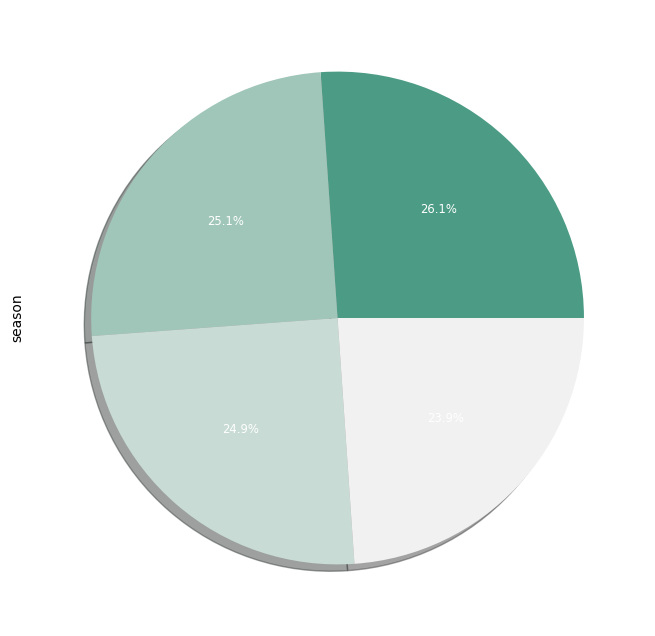

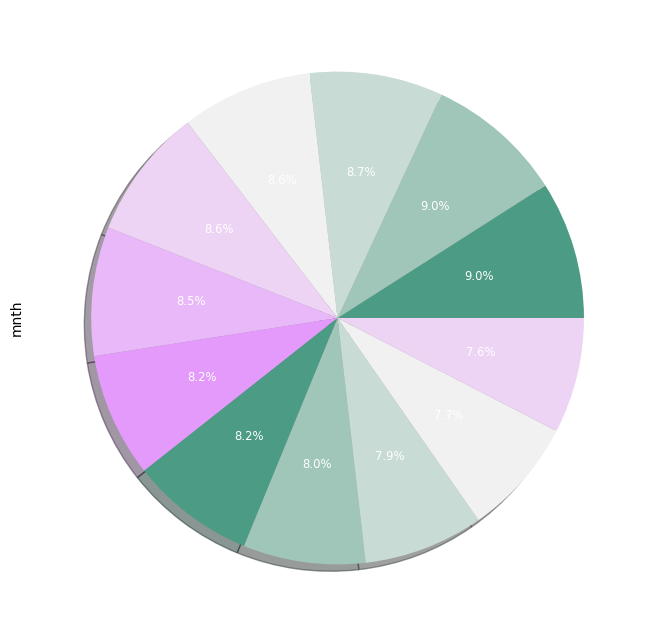

In [ ]:
lista_columnas = ['season','mnth']
similar_variables(lista_columnas)

In [ ]:
categoricas= df.select_dtypes(include='object')
categoricas.head(10)

,season,holiday,workingday
0,invierno,festivo,laborable
1,invierno,no festivo,laborable
2,invierno,no festivo,laborable
3,invierno,no festivo,laborable
4,invierno,no festivo,laborable
5,invierno,no festivo,finde
6,invierno,no festivo,finde
7,invierno,no festivo,laborable
8,invierno,no festivo,laborable
9,invierno,no festivo,laborable


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


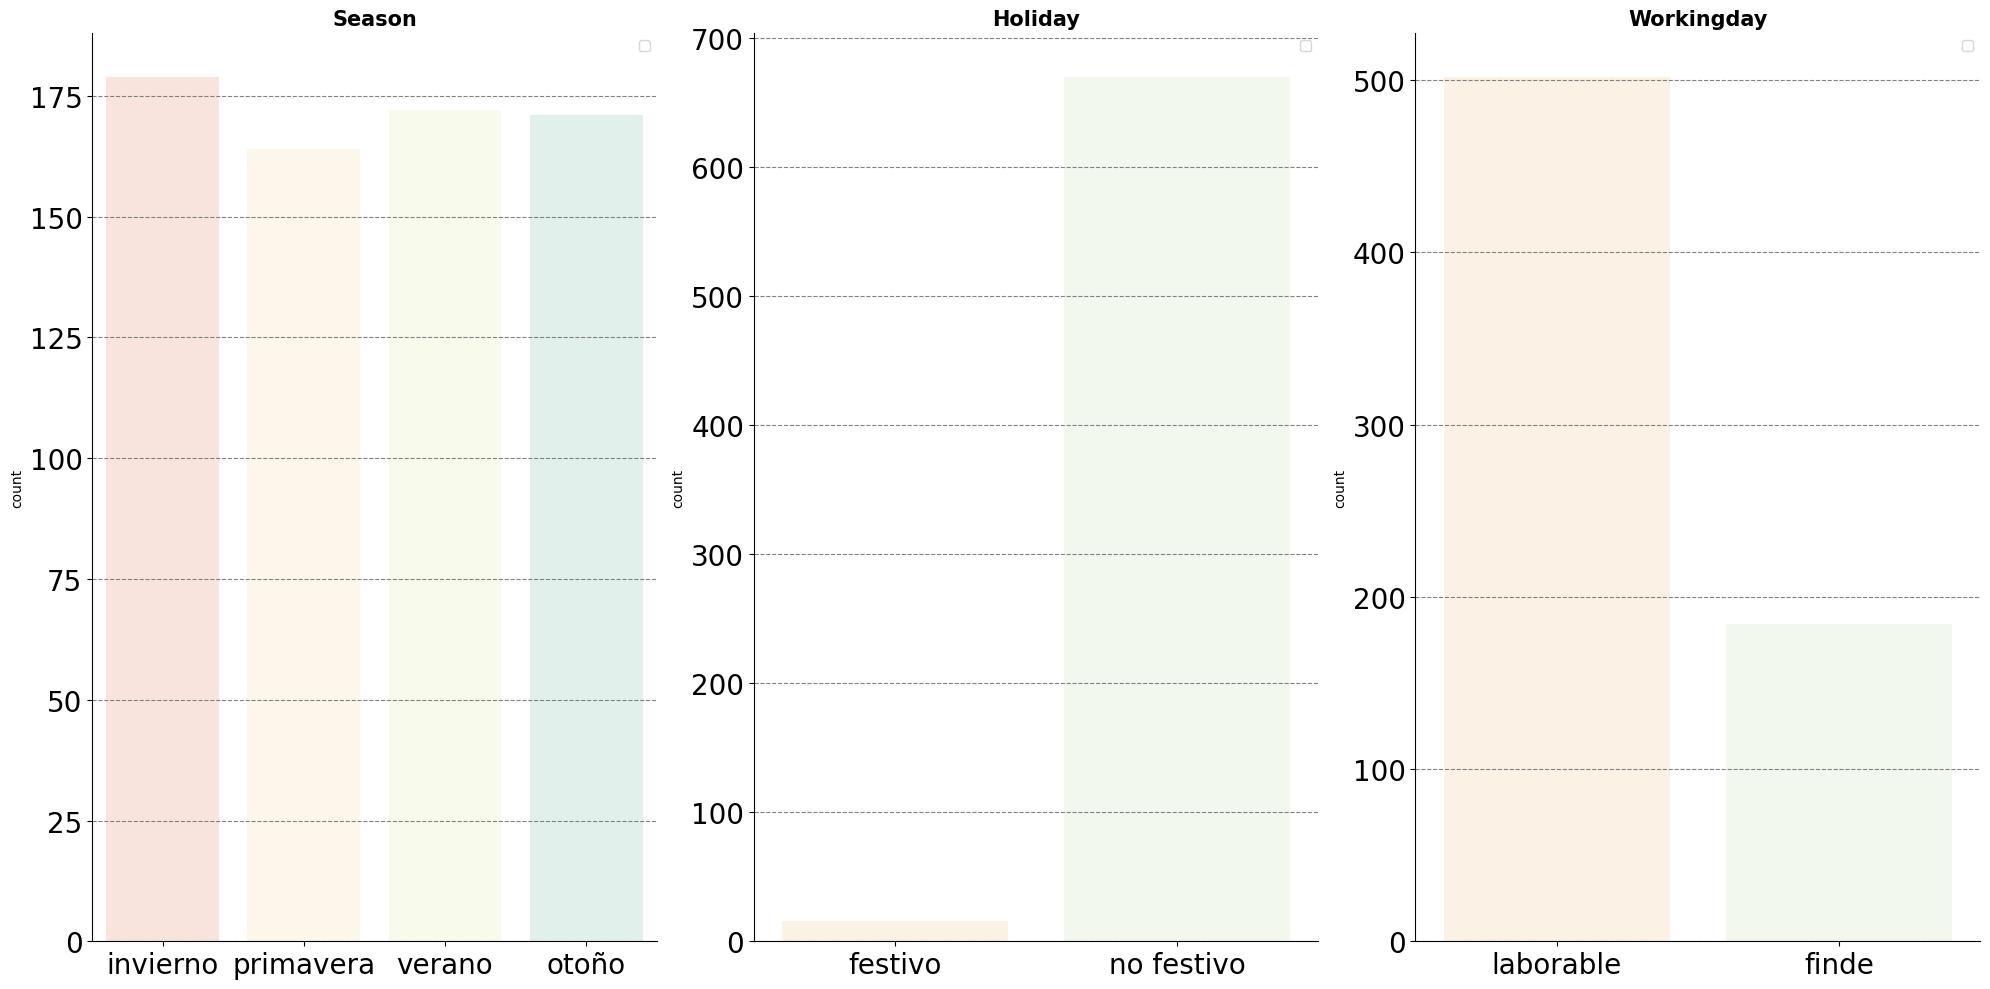

In [ ]:
# Gráfico de distribución para cada variable categórica
# ==============================================================================

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20,10))

axes = axes.flat
columnas_cat = categoricas.columns

for i, colum in enumerate(columnas_cat):
    sns.countplot(
        data = df,
        x = colum,
        #hue = "registered",
        alpha = 0.2,
        palette = 'Spectral', 
        ax = axes[i])
    
    
    axes[i].set_title(colum.capitalize(), fontsize = 15, fontweight = "bold")#titulos con letra mayuscula
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].legend(loc= "upper right")
    axes[i].grid(axis = 'y', color = 'gray', linestyle = 'dashed')# pon el grid
    axes[i].spines['right'].set_visible(False)# borra los bordes
    axes[i].spines['top'].set_visible(False)

fig.tight_layout();

Primero saber los valores unicos

In [ ]:
df.season.unique()

array(['invierno', 'primavera', 'verano', 'otoño', nan], dtype=object)

¿ el hecho de que sea invierno/verano/otoño/primavera puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas NO, por lo tanto la cariable tiene NO TIENE ORDEN

In [ ]:
df.holiday.unique()

array(['festivo', 'no festivo', nan], dtype=object)

¿ el hecho de que sea festivo/no festivo puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas SI, por lo tanto la cariable tiene ORDEN


In [ ]:
df.workingday.unique()

array(['laborable', 'finde', nan], dtype=object)

¿ el hecho de que sea laborable/finde puede hacer que el alquiler de las bicis por los registrados cambie significativamente? 
- A la vista de las graficas SI, por lo tanto la cariable tiene ORDEN

In [ ]:
invierno = df.groupby('season')['registered'].sum()
invierno = pd.DataFrame(invierno).reset_index()
invierno

In [ ]:
sns.barplot(
        data = invierno,
        x = 'season',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');

In [ ]:
working = df.groupby('workingday')['registered'].sum()
working = pd.DataFrame(working).reset_index()
working

In [ ]:
sns.barplot(
        data = working,
        x = 'workingday',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');

In [ ]:
holiday = df.groupby('holiday')['registered'].sum()
holiday = pd.DataFrame(holiday).reset_index()
holiday

In [ ]:
sns.barplot(
        data = holiday,
        x = 'holiday',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');

In [ ]:
semana = df.groupby('weekday')['registered'].sum()
semana = pd.DataFrame(semana).reset_index()
semana

In [ ]:
sns.barplot(
        data = semana,
        x = 'weekday',
        y = 'registered',
        alpha = 0.2,
        palette = 'Spectral');